In [2]:
import numpy as np
import matplotlib.pyplot as plt

Task 2.5C

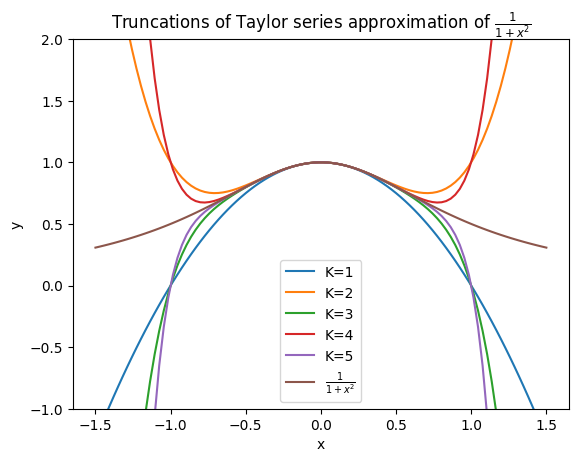

In [3]:
#Taylor series approximation of 1/(1+x^2) 
def taylor_series(x, n_terms):
    series_sum = 0
    for n in range(n_terms + 1):
        term = (-1)**n * x**(2*n)
        series_sum += term
    return series_sum

# Plotting
x = 0.5
n_terms = 10
for K in range(1,6):
    x = np.linspace(-1.5,1.5,100)
    y = taylor_series(x, K)
    plt.plot(x, y, label=f'K={K}')
plt.plot(x, 1/(1+np.power(x, 2)), label=r'$\frac{1}{1+x^2}$')
plt.legend()
plt.title(r'Truncations of Taylor series approximation of $\frac{1}{1+x^2}$')
plt.ylim(-1,2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()



Task 2.2.3

In [20]:
from scipy.integrate import solve_bvp
from scipy.integrate import quad
import sympy as sp
# Define BVs
T0 = 100  
Ta = 0  

#finding integral from 0 to 1 od 1/D(X):

def one_overD(X):
    return (7/2)/(sp.sin(50 * X) + 3)

result, _ = quad(one_overD, 0, 1)

print(f"The integral of D(X) from 0 to 1 is approximately: {result:.6f}")

#symbolically integrating from 1 to X

s = sp.symbols('s')
D = (7/2)/(sp.sin(50 * s) + 3)

X = sp.symbols('X') 
integral = sp.integrate(D, (s, 1, X))

print(f"Symbolic integral of D(s) from 1 to X:\n{integral}")



The integral of D(X) from 0 to 1 is approximately: 1.237523
Symbolic integral of D(s) from 1 to X:
0.035*sqrt(2)*(atan(3*sqrt(2)*tan(25*X)/4 + sqrt(2)/4) + pi*floor((25*X - pi/2)/pi)) - 0.035*sqrt(2)*(atan(3*sqrt(2)*tan(25)/4 + sqrt(2)/4) + 7*pi)


Plot results

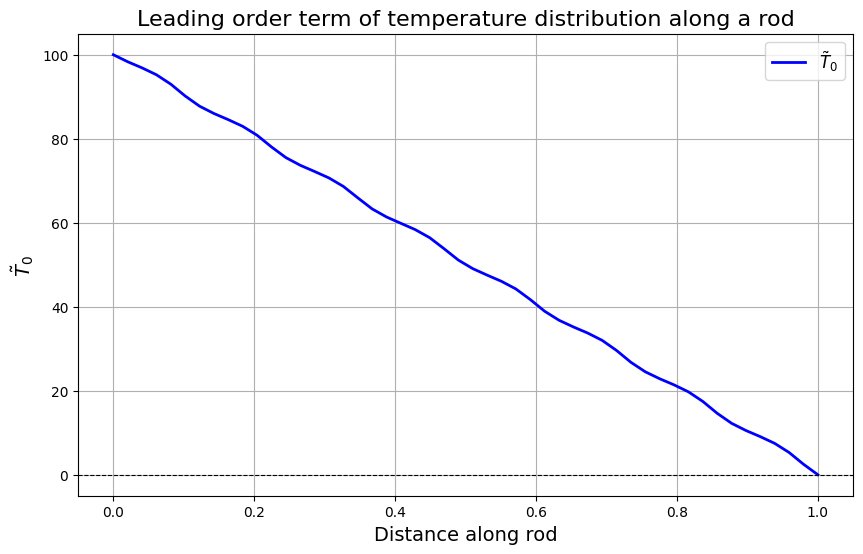

In [24]:
from sympy import lambdify

coeff = -80.775
integral_func = lambdify(X, integral, 'numpy')

X_values = np.linspace(0, 1, 50)  
Tt_0 = coeff * integral_func(X_values)
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X_values, Tt_0, label=r'$\tilde T_{0}$', color='blue', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title(r'Leading order term of temperature distribution along a rod', fontsize=16)
plt.xlabel("Distance along rod", fontsize=14)
plt.ylabel(r'$\tilde T_{0}$', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()